In [40]:
%matplotlib inline

In [41]:
import pickle as pkl
import pandas as pd
from helpers import infected_nodes


In [42]:
graph = 'grqc'
graph_suffix='0.03'
obs_fraction=0.5

In [43]:
inf_probas_path = "outputs/inf_probas/{}-s{}-q{}.pkl".format(graph, graph_suffix, obs_fraction)

In [44]:
stuff = pkl.load(open(inf_probas_path, 'rb'))

In [47]:
inf_nodes_probas_list = []
uninf_nodes_probas_list = []
for row in stuff['random_root']:
    c, obs = row['c'], row['obs']
    inf_nodes = set(infected_nodes(c))
    inf_nodes -= set(obs)  # only hidden infections
    uninf_nodes = (c < 0).nonzero()[0]
    
    probas = row['st_tree_inc_probas']
    inf_node_probas = probas[list(inf_nodes)]
    inf_nodes_probas_list += list(inf_node_probas)
    
    uninf_node_probas = probas[list(uninf_nodes)]
    uninf_nodes_probas_list += list(uninf_node_probas)

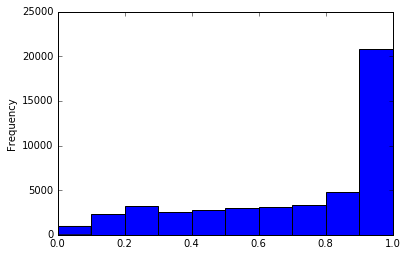

In [48]:
pd.Series(inf_nodes_probas_list).plot('hist')

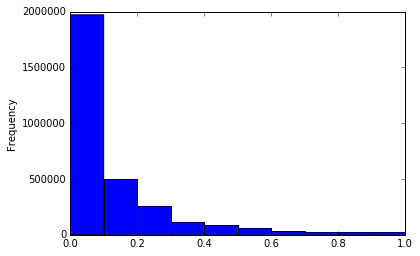

In [49]:
pd.Series(uninf_nodes_probas_list).plot('hist')